### OBJECTIVE 
the aim of the problem is to predict if a client will subscribe (yes/no) to a term deposit, by building a classification model using decision Tree.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

In [2]:
# imoprtiing the dataset
da_ta = pd.read_csv(r"bank.csv")

In [3]:
da_ta.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
da_ta.shape

(11162, 17)

In [5]:
# checking for valuescounts in each column
da_ta.count()

age          11162
job          11162
marital      11162
education    11162
default      11162
balance      11162
housing      11162
loan         11162
contact      11162
day          11162
month        11162
duration     11162
campaign     11162
pdays        11162
previous     11162
poutcome     11162
deposit      11162
dtype: int64

In [6]:
# checking for null values count if any

da_ta.isnull().any(axis=1).value_counts()

False    11162
dtype: int64

In [7]:
da_ta.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [8]:
da_ta.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
# checking target unique values

da_ta['deposit'].unique()

array(['yes', 'no'], dtype=object)

In [10]:
da_ta[da_ta.loan == "yes"].deposit.value_counts()

no     976
yes    484
Name: deposit, dtype: int64

<AxesSubplot:xlabel='age'>

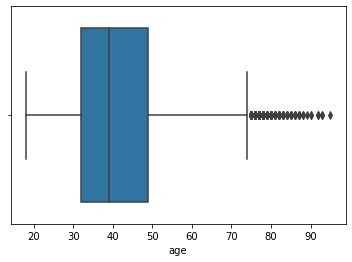

In [11]:
# boxplot for "age"

age_plot = sns.boxplot(x = da_ta["age"])
age_plot

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

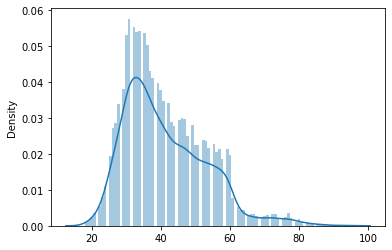

In [12]:
sns.distplot(x = da_ta["age"], bins = 100)

<AxesSubplot:xlabel='duration'>

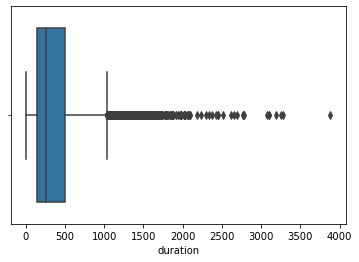

In [13]:
# boxplot for "Duration"
duration_plot = sns.boxplot(x = da_ta["duration"]) 
duration_plot

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

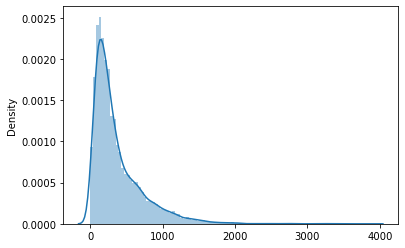

In [14]:
sns.distplot(x = da_ta["duration"], bins = 100)

### Dummy data 

In [15]:
bank_data = da_ta.copy()

In [16]:
bank_data.shape

(11162, 17)

In [17]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [18]:
bank_data["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [19]:
bank_data["job"] = bank_data["job"].replace([ 'management','admin.'], 'White color')
bank_data["job"] = bank_data["job"].replace(['services', 'housemaid'], 'pink color')
bank_data["job"] = bank_data["job"].replace(['unemployed', 'unknown', 'retired', 'student'], 'other')

In [20]:
bank_data["job"].unique()

array(['White color', 'technician', 'pink color', 'other', 'blue-collar',
       'entrepreneur', 'self-employed'], dtype=object)

In [21]:
bank_data['job'].value_counts()

White color      3900
blue-collar      1944
technician       1823
other            1565
pink color       1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

### poutcome

In [22]:
bank_data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [23]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['unknown', 'other'], 'other')

In [24]:
bank_data['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

### contact

In [25]:
bank_data['contact'].value_counts() 

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

Drop contact as every contact has been contacted 

In [26]:
bank_data.drop("contact", axis = 1, inplace = True)

In [27]:
bank_data.head(2)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,White color,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,other,yes
1,56,White color,married,secondary,no,45,no,no,5,may,1467,1,-1,0,other,yes


### default

In [28]:
bank_data["default_cat"] = bank_data["default"].map({"yes":1, 'no':0})

In [29]:
bank_data.drop("default", axis = 1, inplace = True)

In [30]:
bank_data.head(2)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,White color,married,secondary,2343,yes,no,5,may,1042,1,-1,0,other,yes,0
1,56,White color,married,secondary,45,no,no,5,may,1467,1,-1,0,other,yes,0


### housing

In [31]:
bank_data["housing_cat"] = bank_data["housing"].map({"yes":1, "no":0})
bank_data.drop("housing", axis = 1, inplace = True)

In [32]:
bank_data.head(2)

,age,job,marital,education,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat
0,59,White color,married,secondary,2343,no,5,may,1042,1,-1,0,other,yes,0,1
1,56,White color,married,secondary,45,no,5,may,1467,1,-1,0,other,yes,0,0


### loan

In [33]:
bank_data["loan_cat"] = bank_data["loan"].map({"yes":1, "no":0})

In [34]:
bank_data.drop("loan", axis =1, inplace = True)

In [35]:
bank_data.head(2)

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,White color,married,secondary,2343,5,may,1042,1,-1,0,other,yes,0,1,0
1,56,White color,married,secondary,45,5,may,1467,1,-1,0,other,yes,0,0,0


### month and day

In [36]:
# month - last contact month of year
# day - last contact day of month
# Drop month and day as they don't have any intrinsic meaning

bank_data.drop(["month", "day"], axis =1, inplace =True)

In [37]:
bank_data.head(2)

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,White color,married,secondary,2343,1042,1,-1,0,other,yes,0,1,0
1,56,White color,married,secondary,45,1467,1,-1,0,other,yes,0,0,0


### deposit - target feature

In [38]:
bank_data["deposit_cat"] = bank_data["deposit"].map({"yes":1, "no":0})

In [39]:
bank_data.drop("deposit", axis =1, inplace =True)

In [40]:
bank_data.head(2)

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,White color,married,secondary,2343,1042,1,-1,0,other,0,1,0,1
1,56,White color,married,secondary,45,1467,1,-1,0,other,0,0,0,1


### pdays

In [41]:
# pdays = number of days that passed by after the client was last contacted from the previous campaign 
# -1 means client was not contacted 

print("number of days that passed by after the client was last contacted -", len(bank_data[bank_data.pdays == -1]))
print("maximum values on pdays -", bank_data["pdays"].max())

number of days that passed by after the client was last contacted - 8324
maximum values on pdays - 854


In [42]:
# map pdays = -1 into a larger value(10000 can be used ) to show that it  is so far in the past and it has not affect  

bank_data.loc[bank_data.pdays == -1, "pdays"] = 10000

In [43]:
# create new column for pdays - recent_pdays

bank_data["recent_pdays"] = np.where(bank_data["pdays"], 1/bank_data.pdays, 1/bank_data.pdays)

In [44]:
bank_data.drop(["pdays"], axis = 1, inplace = True)

In [45]:
bank_data.head()

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,White color,married,secondary,2343,1042,1,0,other,0,1,0,1,0.0001
1,56,White color,married,secondary,45,1467,1,0,other,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,1389,1,0,other,0,1,0,1,0.0001
3,55,pink color,married,secondary,2476,579,1,0,other,0,1,0,1,0.0001
4,54,White color,married,tertiary,184,673,2,0,other,0,0,0,1,0.0001


### Convert categorical values to Dummy values

In [46]:
bank_with_dummies = pd.get_dummies(data = bank_data, columns= ["job", "marital", "education", "poutcome"],
                                  prefix = ["job", "marital", "education", "poutcome"])
bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,1,0


In [47]:
bank_with_dummies.shape

(11162, 27)

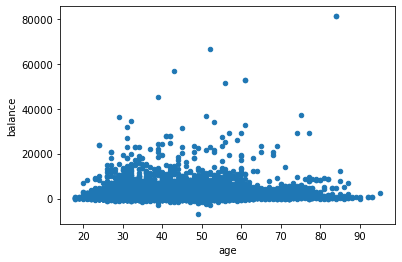

In [48]:
### observation on whole population

bank_with_dummies.plot(kind = "scatter", x = "age", y = "balance")
plt.show()

Across all ages majority of population has a saving of less than '20000'

<AxesSubplot:ylabel='Frequency'>

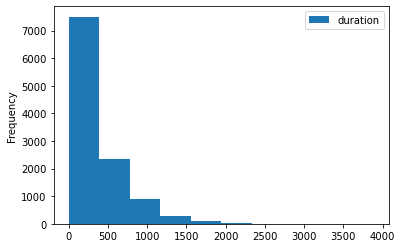

In [49]:
bank_with_dummies.plot(kind = "hist", x= "poutcome_success", y ="duration")

### Classification

In [50]:
# make a copy of dataset

In [51]:
c_data = bank_with_dummies

In [52]:
c_data.head(2)

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,1,0


In [53]:
corr_data = c_data.corr()
corr_data

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,-0.038992,0.062114
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,-0.034524,0.045603
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,0.042725,-0.022578
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,0.128907,-0.091807
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,-0.496921,0.325477
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,0.048403,-0.040272
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,0.031375,-0.136299
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,0.053686,-0.080370
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,-0.224785,0.286642
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,-0.126890,0.119598


In [54]:
# htmap = sns.heatmap(c_data, cmap = 'magma', cbar = True, annot_kws = {'size':1})

### Extract the deposit_cat (dependent variable)

In [55]:
pd.DataFrame(corr_data["deposit_cat"].drop("deposit_cat")).sort_values(by = "deposit_cat", ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_White color,0.031621


In [56]:
# spliting data into dependent and independent variable
data_drop_deposit = c_data.drop("deposit_cat", axis =1)
label = c_data["deposit_cat"]


### Split the data into train_test_split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# splitting the data with 20% test data
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposit, label, test_size = 0.2, random_state = 50)

### building the model

### Devision tree with depth 2

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dt2 = DecisionTreeClassifier(random_state = 1, max_depth = 2)

In [61]:
dt2.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [63]:
dt2_score_train = dt2.score(data_train, label_train)
print("training_score", dt2_score_train)

training_score 0.7285250307985217


In [65]:
dt2_score_test = dt2.score(data_test, label_test)
print("test_score", dt2_score_test)

test_score 0.7268248992386923


In [68]:
prediction = dt2.predict(data_test) 

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deposit_cat', ylabel='Density'>

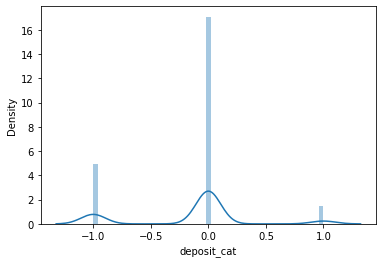

In [69]:
sns.distplot(label_test - prediction)

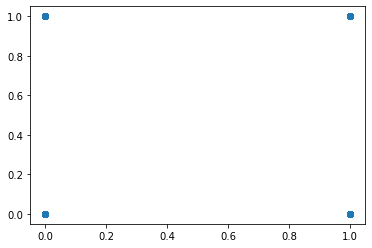

In [70]:
plt.scatter(label_test, predictions)

### Decision tree witn depth = 3

In [71]:
dt3 = DecisionTreeClassifier(random_state =1, max_depth =3)

In [72]:
dt3.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [74]:
dt3_score_train = dt3.score(data_train, label_train)
print("training_score", dt3_score_train)

training_score 0.770411020271027


In [77]:
dt3_score_test = dt3.score(data_test, label_test)
print("test_score", dt3_score_test)

test_score 0.7572772055530677


### Decision tree with depth = 4

In [78]:
dt4 = DecisionTreeClassifier(random_state = 1, max_depth = 4)

In [79]:
dt4.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [82]:
dt4_score_train = dt4.score(data_train, label_train)
print("training_score", dt4_score_train)

training_score 0.7885541494008288


In [86]:
dt4_score_test = dt4.score(data_test, label_test)
print("test_score", dt4_score_test)

test_score 0.774294670846395


 ### Decision tree with depth = 6

In [87]:
dt6 = DecisionTreeClassifier(random_state = 1, max_depth = 6)

In [88]:
dt6.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [89]:
dt6_score_train = dt6.score(data_train, label_train)
print("training_score", dt6_score_train)

training_score 0.8080412140217269


In [91]:
dt6_score_test = dt6.score(data_test, label_test)
print("test_score", dt6_score_test)

test_score 0.7796686072548141


### Decision tree to the full depth

In [93]:
dt = DecisionTreeClassifier()

In [96]:
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("training_score", dt_score_train)

dt_score_test = dt.score(data_test, label_test)
print("test_score", dt_score_test)

training_score 1.0
test_score 0.7384684281236006


### Compare Training and Testing scores for various tree depths used

In [125]:
print('{:10} {:20} {:20}'.format('depth', 'training_score', 'test_score'))
print('{:10} {:20} {:20}'.format('--------', '--------------', '-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:22} {:20}'.format('max', dt_score_train, dt_score_test))

depth      training_score       test_score          
--------   --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                    1.0   0.7384684281236006


from above obssrvations it could be seen that higher the depth training score increases and matches more perfect with the training dataset. However higher the deoth the tree goes,  it overfit the training dataset, it is not necessary to increase the tree depth.
So, according to above observations the tree with depth 2 seems more reasonablea as both training and test score are reasonably high.